# P411 - Assignment 1
Kristi Webb, Sept 18 2015

github k-a-webb

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

## Q1: Simulate aliasing of sinusoidal signals

For this problem you will simulate the phenomena of aliasing.  This will give you pracitice in making synthetic time series, subsetting data, and plotting your results.

**1** To start, make a time vector that goes from 0 to 120 s, with 10000 entries in it.  Then make a synthetic time series that has two close in frequency sine waves:

$$ x = A_1 \cos (\omega t) + A_2 \cos ((\omega_1+\delta \omega ) t) $$

where $\omega$ is the "carrier" frequency, and $\delta \omega << \omega$ is the difference in frequencies between the two waves.  For simplicty, you could make $A_1=A_2=1. [V]$.  Feel free to choose an interesting $\omega$.

<hr>

Wave function with ω=π/2, δω=π/100


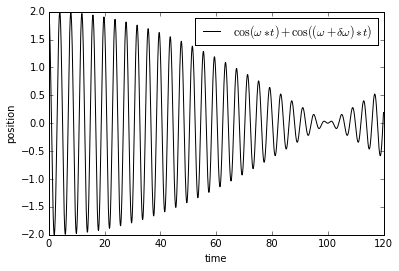

In [8]:
time = np.linspace(0,120,10000)
x = make_wave(np.pi/2,np.pi/100,time)

print 'Wave function with ω=π/2, δω=π/100'
plot_wave(x, time)

**2** Now plot the two component waves and the full value of $x$ as a time series.  Preferably on the same axis.  Make sure to label your axes and include a legend<hr>

Wave function components with ω=π/2, δω=π/100


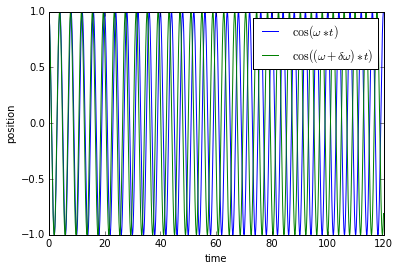

In [9]:
print 'Wave function components with ω=π/2, δω=π/100'
plot_wave_cmps(x, time)


**3** Try a few different values of $\delta\omega$, and compare.<hr>

Wave function with ω=π/2, δω=π/10


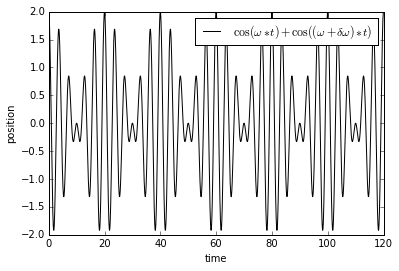

Wave function with ω=π/2, δω=π/20


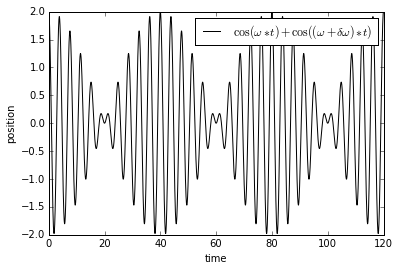

Wave function with ω=π/2, δω=π/500


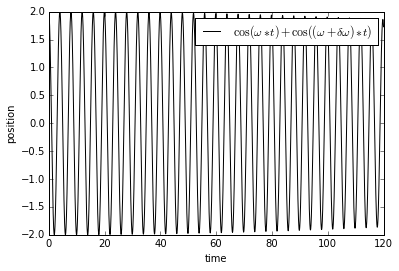

In [10]:
print 'Wave function with ω=π/2, δω=π/10'
plot_wave(make_wave(np.pi/2,np.pi/10,time), time)
# plot_wave_cmps(make_wave(np.pi/2,np.pi/10,time), time)

print 'Wave function with ω=π/2, δω=π/20'
plot_wave(make_wave(np.pi/2,np.pi/20,time), time)
# plot_wave_cmps(make_wave(np.pi/2,np.pi/20,time), time)

print 'Wave function with ω=π/2, δω=π/500'
plot_wave(make_wave(np.pi/2,np.pi/500,time), time)
# plot_wave_cmps(make_wave(np.pi/2,np.pi/500,time), time)

The phase difference ($\delta\omega$) between the two components of the wave accounts for the width of the 'pulse' of the wave function.

<hr>
**4** Now, just so this works, let me specify some numbers for you.  Make $\omega=\frac{2\pi}{3}$, and $\delta\omega=\omega/10.$.  Plot the original time series, and a subsampled time series that just consists of every 200th point.  In a "Markdown" box below the code (or as a comment) describe the difference in these two signals as quantifiably as you can.  <hr>

In [68]:
x = make_wave(2*np.pi/3, 2*np.pi/30, time)
time_samp = np.linspace(0,120,50)
x_samp = make_wave(2*np.pi/3, 2*np.pi/30, time_samp)

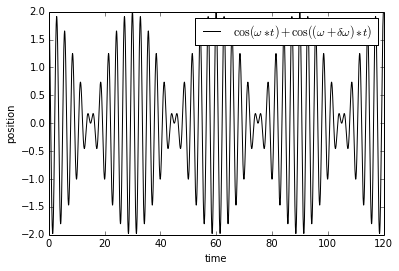

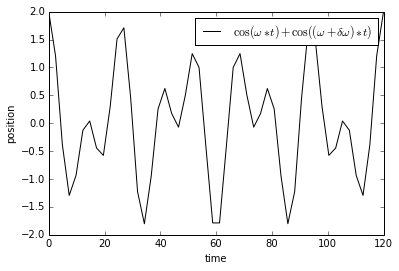

In [71]:
plot_wave(x, time)
plot_wave(x_samp, time_samp)

The difference between the signals is (of course) the sampling, in that the plots depict how the time series will appear differently depending on how often you take data. The frequency that you use to measure the time series should be equivalent (or less than) the inherant frequency of the time series.

<hr>
## Q2: Demonstrate the central limit theorem for a very unfair coin flip.

Consider a coin that is twice as likely to come up heads as tails. To put a number on it, call tails $x=-1/2$ and heads $x=+1/2$.  

**1** What are the mean, $\mu_x$, and variance $\sigma_x^2$ of this process?

<hr>

In [32]:
x = np.array([-.5,.5])
P = np.array([1./3.,2./3.])
mean = mean_prob(x,P)
var = var_prob(x,P)

print 'Mean: {},  variance: {}'.format(mean, var)

Mean: 0.166666666667,  variance: 0.222222222222


<hr>
**2** Plot or represent the *probability distribution*  (or cumulative distrubution) of this process.
<hr>

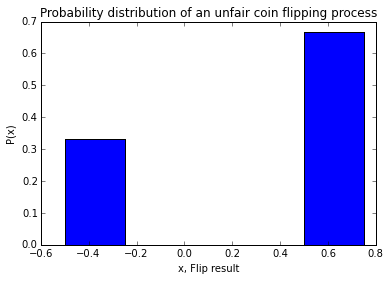

In [33]:
plt.bar(x, P, .25)
plt.xlabel('x, Flip result')
plt.ylabel('P(x)')
plt.title('Probability distribution of an unfair coin flipping process')

<hr>
**3** Write a function using the `np.random.rand` function to simulate the coin flip.  It shoudl return $+1/2+$ twice as often as $-1/2$.  Demonstrate that your function works.
<hr>

In [34]:
nflips = 1000
flips = np.random.choice(x,nflips,p=P) # simpler implementation than np.random.rand

num_heads = sum(i > 0 for i in flips)
num_tails = sum(i < 0 for i in flips)

print 'Number of heads: {}, number of tails: {}, fraction of heads per tails: {}'.format(
    num_heads, num_tails, num_heads/num_tails)

Number of heads: 700, number of tails: 300, fraction of heads per tails: 2


As we see from the above code, for a random flip of a 'weighted' coin, we see the expected result represents the probability of the outcomes well in that the number of heads (which has twice the probability of occuring) does it fact occur almost twice as often.

<hr>
**4** Perform $N_{flip}$ and take the sample mean $\overline{x}$ of the values.  Do this 2000 times, and show that as $N_{flip}\to\infty$ the distribution of $\overline{x}$ approaches a Normal distribution by plotting the histograms of the means for each.  For $N_{flip}$ choose 2, 16, 64, 256. 

Comment on how the convergence of $\overline{x}$ for the unfair coin compares to the convergence of the sample mean of the dice roll from the notes.  
<hr>

In [35]:
result_2 = flip_coin(x,P,2)
result_16 = flip_coin(x,P,16)
result_64 = flip_coin(x,P,64)
result_256 = flip_coin(x,P,256)

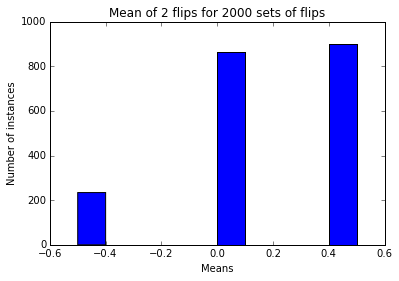

In [36]:
mean2 = flip_mean(x,P,2,2000)

plt.hist(mean2)
plt.xlabel('Means')
plt.ylabel('Number of instances')
plt.title('Mean of 2 flips for 2000 sets of flips')
plt.show()

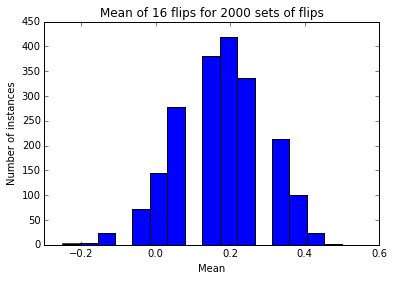

In [37]:
mean16 = plot_flip_mean(x,P,16,2000)

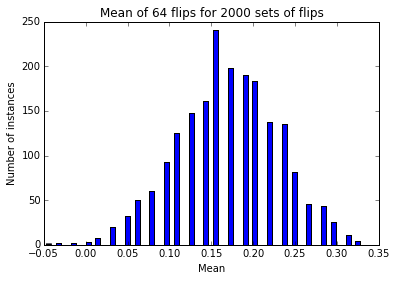

In [38]:
mean64 = plot_flip_mean(x,P,64,2000)

Mean of 2000 sets of 256 rolls:  0.165001953125


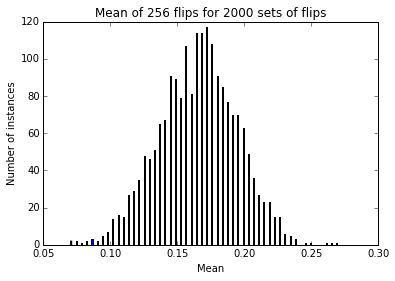

In [39]:
mean256 = plot_flip_mean(x,P,256,2000)
print 'Mean of 2000 sets of 256 rolls: ',np.mean(mean256)

We expect the distribution of the means to approximate a normal distribution when there is a sufficient amount of data. This can be observed in the above graphs, where the more data we collect, the better our histrogram represents the expected distribution. With increasing flips, we see a more obvious peak, and a decreasing full-width-half-maximum of the distribution, indicating a better precision for the calculation of the mean.

We also see that the convergence of the means, ie the sample mean $\overline{x}$ (0.16652), agrees well with the distribution mean  $\mu_x$ initially calculated in question 2.1 of 0.16666666. 

This is the same as we saw for the dice roll in the lecture notes.


<hr>
**5** Replot the histograms, removing the mean and normalizing by the standard deviation.  Also show the CDF for normal distribution with mean zero and standard deviation of 1.

s. 1, Q2.5 is not quite correct.

It should say "Replot the histograms, removing the mean and normalizing by the standard deviation. Also show the PDF for normal distribution with mean zero and standard deviation of 1.”  I mistakenly had said “CDF” but of course you do not compare a histogram to a CDF, but to the PDF.
<hr>

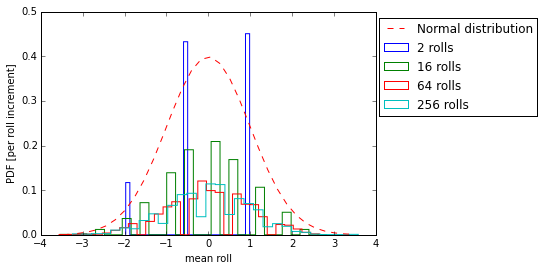

In [44]:
fig,ax=plt.subplots(1,1)
bins = 30

mns = [mean2,mean16,mean64,mean256]
lbls = ['2 rolls', '16 rolls', '64 rolls', '256 rolls']

for i, mn in enumerate(mns):
    wgt = np.ones_like(mean_mean(mn))/len(mn)
    n, binsc, patches = ax.hist(mean_mean(mn),bins,label=lbls[i],histtype='step', weights=wgt)

ax.set_xlabel('mean roll')
ax.set_ylabel('PDF [per roll increment]')

bincenters = 0.5*(binsc[1:]+binsc[:-1])
# add a 'best fit' line for the normal PDF
y = mlab.normpdf(bincenters, 0., 1.)
l = ax.plot(bincenters, y, 'r--', linewidth=1, label='Normal distribution')

ax.legend(bbox_to_anchor=(1.5, 1))

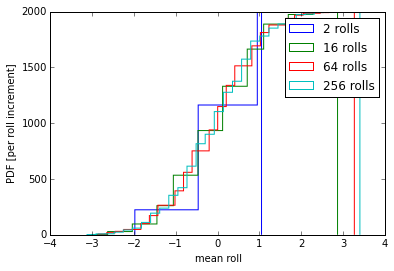

In [73]:
fig,ax=plt.subplots(1,1)
bins = 30

mns = [mean2,mean16,mean64,mean256]
lbls = ['2 rolls', '16 rolls', '64 rolls', '256 rolls']

for i, mn in enumerate(mns):
    ax.hist(mean_mean(mn),bins,label=lbls[i],histtype='step', cumulative=True)

ax.set_xlabel('mean roll');ax.set_ylabel('PDF [per roll increment]')
ax.legend()

<hr>
# Q3: Look at the Deep Cove weather data: 

There are two data sets, one with a sample every minute at 

`http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt`.

Download it locally, or use `genfromtxt` with the url as an argument.

The second is hourly data of the smae station and a lot more.

`http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/AllHourly.txt`



In [3]:
minutedata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[6,2:]

<hr>
**1** Compare the normalized histograms of the two time series.  Also calculate the means and the standard deviations.
<hr>

In [4]:
data_min = minutedata[~np.isnan(minutedata)]
data_hr = hourdata[~np.isnan(hourdata)]

Data sampled by minute - mean: 10.3016961717, stdev: 5.98530478686
Data sampled by hour - mean: 10.3387280591, stdev: 6.06772257867


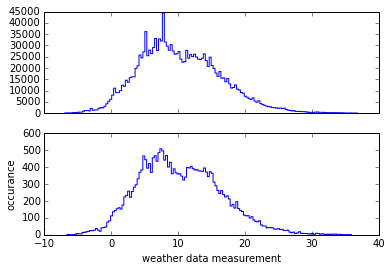

In [49]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
ax1.hist(data_min, 150, histtype='step', label='sampled by minute')
ax2.hist(data_hr, 150, histtype='step', label='sampled by hour (averaged)')
plt.xlabel('weather data measurement')
plt.ylabel('occurance')

print 'Data sampled by minute - mean: {}, stdev: {}'.format(np.mean(data_min), np.std(data_min))  
print 'Data sampled by hour - mean: {}, stdev: {}'.format(np.mean(data_hr), np.std(data_hr)) 

<hr>
**2** Comment on the shape of these histograms.  Are they Normal?  Speculate as to why they have this shape.
<hr>

Neither of these histograms are normal - which is what we expect. We are sampling weather data over the course of years, which we understand to vary over the course of a year, and perhaps also over the span of years. This means that the mean will not necessarily define the measurements particularly well, and the distribution is much broader (ie with higher standard deviation) than would be expected for a normal function.

<hr>
**3** Redo the histogram and the statistics with just the temperature at 3 PM (both time series start at midnight local time).
<hr>

In [16]:
data_min_3pm = minutedata[900::24*60]
data_min_3pm_cln = data_min_3pm[~np.isnan(data_min_3pm)]

data_hr_3pm = hourdata[15::24]
data_hr_3pm_cln = data_hr_3pm[~np.isnan(data_hr_3pm)]

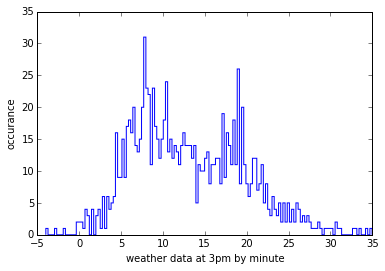

Data sampled by minute - mean: 13.1277794034, stdev: 6.57159473341


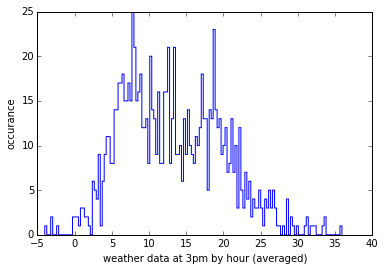

Data sampled by hour - mean: 13.2200563554, stdev: 6.72423407189


In [18]:
plt.hist(data_min_3pm_cln, 150, histtype='step')
plt.xlabel('weather data at 3pm by minute')
plt.ylabel('occurance')
plt.show()

print 'Data sampled by minute - mean: {}, stdev: {}'.format(
    np.mean(data_min_3pm_cln), np.std(data_min_3pm_cln))  

plt.hist(data_hr_3pm_cln, 150, histtype='step')
plt.xlabel('weather data at 3pm by hour (averaged)')
plt.ylabel('occurance')
plt.show()

print 'Data sampled by hour - mean: {}, stdev: {}'.format(
    np.mean(data_hr_3pm_cln), np.std(data_hr_3pm_cln)) 

<hr>
**4** Redo the histogram and the statistics with just the temperature at 5 AM (both time series start at midnight local time).
<hr>

In [19]:
data_min_5am = minutedata[5*60::24*60]
data_min_5am_cln = data_min_5am[~np.isnan(data_min_5am)]

data_hr_5am = hourdata[5::24]
data_hr_5am_cln = data_hr_5am[~np.isnan(data_hr_5am)]

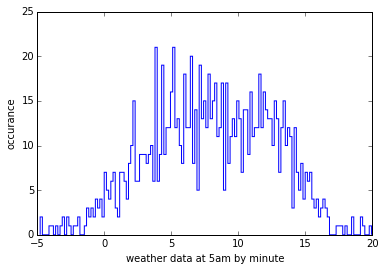

Data sampled by minute - mean: 8.00691969785, stdev: 4.52813043505


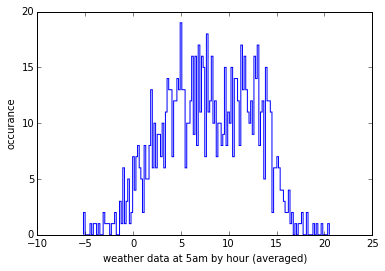

Data sampled by hour - mean: 7.94269411541, stdev: 4.63240283974


In [20]:
plt.hist(data_min_5am_cln, 150, histtype='step')
plt.xlabel('weather data at 5am by minute')
plt.ylabel('occurance')
plt.show()

print 'Data sampled by minute - mean: {}, stdev: {}'.format(
    np.mean(data_min_5am_cln), np.std(data_min_5am_cln))  

plt.hist(data_hr_5am_cln, 150, histtype='step')
plt.xlabel('weather data at 5am by hour (averaged)')
plt.ylabel('occurance')
plt.show()

print 'Data sampled by hour - mean: {}, stdev: {}'.format(
    np.mean(data_hr_5am_cln), np.std(data_hr_5am_cln)) 

We see that the measurements are close, but we do see differences depending on how the data points were obtained. Because the hour data points were an average, they don't represent the exact measurement on the hour, but the average over that hour. 


In [11]:
def make_wave(w, dw, t):
    return np.cos(w*t), np.cos((w + dw)*t)

def plot_wave(x, t):
    plt.plot(t, x[0]+x[1], '-k',
         label='$\cos(\omega*t)+\cos((\omega+\delta\omega)*t)$')
    plt.xlabel('time')
    plt.ylabel('position')
    plt.legend()
    plt.show()
    

def plot_wave_cmps(x, t):
    plt.plot(t, x[0], '-b', label='$\cos(\omega*t)$')
    plt.plot(t, x[1], '-g', label='$\cos((\omega+\delta\omega)*t)$')
    plt.xlabel('time')
    plt.ylabel('position')
    plt.legend()
    plt.show()

In [12]:
def mean_prob(x, P):
    assert len(x) == len(P), 'Arrays are unequal in length'
    return np.sum(x*P)

def var_prob(x, P):
    mu = mean_prob(x,P)
    return np.sum(P*(x-mu)**2)

def flip_coin(x, P, nflips):
    flips = np.random.choice(x,nflips,p=P) # simpler implementation than np.random.rand

    num_heads = sum(i > 0 for i in flips)
    num_tails = sum(i < 0 for i in flips)
    
    return num_tails, num_heads

def flip_mean(x,P,nflips,N):
    mean = np.zeros(N)
    for i in range(N):
        mean[i] = np.dot(flip_coin(x,P,nflips), x)/nflips
    
    return mean

def plot_flip_mean(x,P,nflips,N):
    mean = flip_mean(x,P,nflips,2000)
    plt.hist(mean,bins=nflips)
    plt.xlabel('Mean')
    plt.ylabel('Number of instances')
    plt.title('Mean of {} flips for {} sets of flips'.format(nflips,N))
    plt.plot()
    return mean

def mean_mean(mean):
    return (mean-np.mean(mean))/np.std(mean)